<a href="https://colab.research.google.com/github/Joonqi/Section_Projects/blob/main/S1_GameData_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 project
이 프로젝트는 게임별 매출 데이터를 바탕으로 **'다음 분기에는 어떤 게임을 개발해야 할까?'** 라는 질문에 답을 도출하는 과정입니다.  
최종적인 답을 도출하기 위해 다음 3가지 과정을 거쳤습니다.  
- 지역에 따라 선호하는 게임의 장르가 다른가
- 연도별로 게임의 트렌드가 존재하는가
- 출고량이 높은 게임에 대한 분석

In [ ]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()
qualitative_colors = sns.color_palette("Paired", 31)
sns.set_palette(qualitative_colors)
sns.set_style('white')

In [ ]:
df = pd.read_csv(url, index_col=0) # 결측치 / 데이터타입확인
df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# df 세일즈 데이터 float로 정리

df = pd.read_csv(url, index_col=0)

def to_num(s):
    if 'K' in s:
        k = float(s.replace('K', '')) / 1000
    elif 'M' in s:
        k = float(s.replace('M', ''))
    else:
        k = float(s)
    return float(k)
    
# 기본단위는 1,000,000 (M)

df['NA_Sales'] = df['NA_Sales'].apply(to_num)
df['EU_Sales'] = df['EU_Sales'].apply(to_num)
df['JP_Sales'] = df['JP_Sales'].apply(to_num)
df['Other_Sales'] = df['Other_Sales'].apply(to_num)


# Year 데이터 4자리로 정리, 정수형으로 변환 (NaN 안건드리고)
def convert_year(y):
    try:
        if y >= 0 and y <= 21:
            y += 2000
        elif y >= 80 and y <= 99:
            y += 1900
        else:
            y = y
        return int(y)
    except:
        return y

df['Year'] = df['Year'].apply(convert_year).astype('Int64')

# Total Sales Column 추가
df['Total_Sales'] = df.loc[:, 'NA_Sales':'Other_Sales'].sum(axis=1)

# Year 순서대로 재정렬
df = df.sort_values(by='Year').reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  Int64  
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537164
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555151
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df[df['Year'].isna()].shape  # 271개 Nan

(271, 10)

In [ ]:
df['Platform'].unique()  # 플랫폼 확인

array(['2600', 'NES', 'PC', 'DS', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD',
       'SAT', 'PS', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2',
       'GBA', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

In [ ]:
df['Publisher'].nunique()   # Publisher 확인

578

In [ ]:
df['Genre'].unique()    # 장르 확인

array(['Misc', 'Shooter', 'Fighting', nan, 'Action', 'Platform', 'Puzzle',
       'Sports', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [ ]:
df[df['Genre'].isna()].shape  # 50개 Nan

(50, 10)

In [ ]:
df[df['Year'] != np.nan].tail(10)
# 2017, 2020 데이터는 사실상 drop (분석할 때 활용하지 않음)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
16317,Etrian Odyssey V,3DS,2016,Role-Playing,Atlus,0.00,0.00,0.12,0.00,0.12
16318,Nobunaga's Ambition: Sphere of Influence - Sen...,PSV,2016,Misc,Tecmo Koei,0.00,0.00,0.04,0.00,0.04
16319,Battleborn,PC,2016,Shooter,Take-Two Interactive,0.03,0.03,0.00,0.01,0.07
16320,Haikyu!! Cross Team Match!,3DS,2016,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04
16321,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,Namco Bandai Games,0.00,0.02,0.00,0.00,0.02
16322,Terraria,3DS,2016,Action,505 Games,0.00,0.03,0.04,0.00,0.07
16323,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16324,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16325,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16326,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29


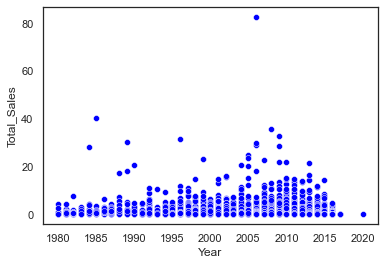

In [ ]:
# 대략적인 분포 확인
sns.scatterplot(x=df['Year'], y=df['Total_Sales'], color='blue');
# 다수의 수치가 낮지만 특출나게 높은 경우가 몇 있다.

# Section 1 Project

## Q1 지역에 따라 선호하는 게임 장르가 다를까?
## Q2 연도별 게임의 트렌드가 있을까?
## Q3 출고량이 높은 게임에 대한 분석 및 시각화
## => 다음 분기에 어떤 게임을 설계해야 할까

# Q1 : 지역에 따라 선호하는 게임 장르가 다를까?
### 지역별 Two-Sample 카이제곱 검정

In [ ]:
from scipy import stats

In [ ]:
# Non Zero count ChiSquare Test
# 판매량이 0인 지역은 '발매되지 않았다' 가정하고 진행
# 지역에 따른 발매 게임 장르의 차이

stacked = np.array([[0, 0, 0, 0]])

for i in df.Genre.dropna().unique():
    stack = np.count_nonzero(df[df['Genre'] == i].loc[:, 'NA_Sales':'Other_Sales'], axis=0)
    stacked = np.concatenate((stacked, stack.reshape(1, 4)), axis=0)

    
stacked = pd.DataFrame(stacked)
stacked.drop(index= [0], inplace=True)
stacked.index = df.Genre.dropna().unique()
stacked.columns=['NA', 'EU', 'JP', 'Other']

In [ ]:
stats.chi2_contingency(stacked)[:3]

(1650.4669267444222, 0.0, 33)

In [ ]:
# H0 : Two Variables are independent. (rejected)
# H1 : Two Variables are dependent to each other

# 지역마다 발매된 게임의 장르 분포가 다르다!

#### 하지만 선호도 (= Sales) 도 동일할까?

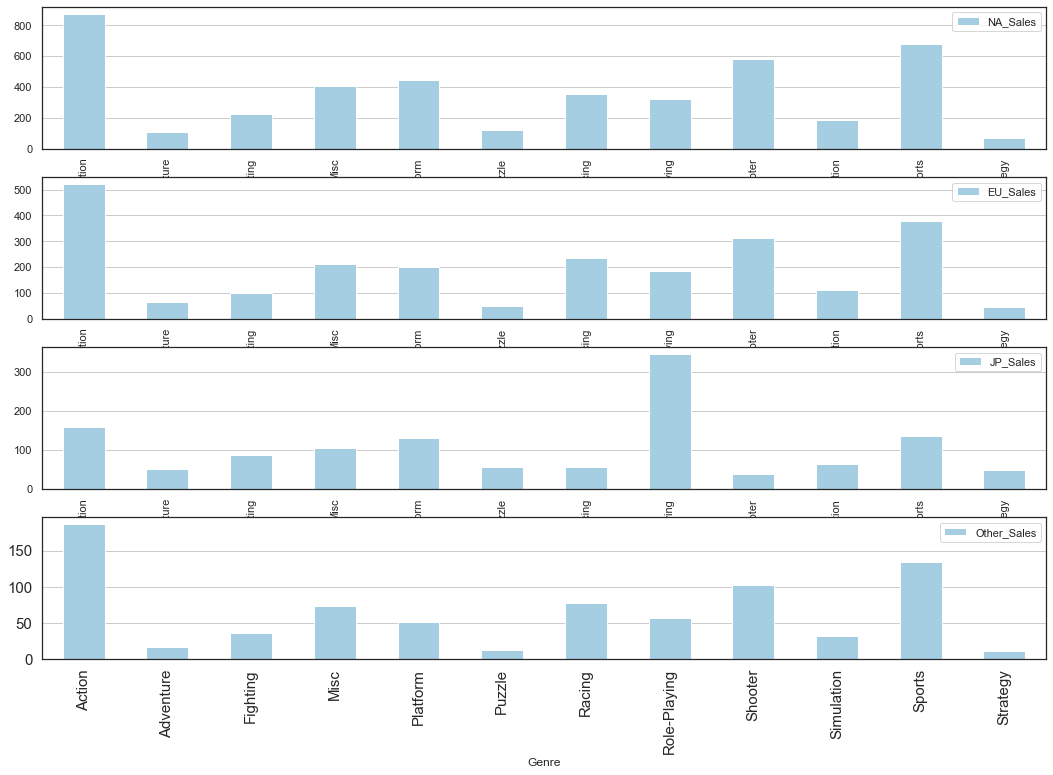

In [ ]:
# 지역별 Sales 비교

plt.figure(figsize=(18, 12))

plt.subplot(411)
df.groupby('Genre').NA_Sales.sum().sort_index().plot(kind='bar', legend=True)
plt.grid(axis='y')

plt.subplot(412)
df.groupby('Genre').EU_Sales.sum().sort_index().plot(kind='bar', legend=True)
plt.grid(axis='y')

plt.subplot(413)
df.groupby('Genre').JP_Sales.sum().sort_index().plot(kind='bar', legend=True)
plt.grid(axis='y')

plt.subplot(414)
df.groupby('Genre').Other_Sales.sum().sort_index().plot(kind='bar', legend=True, fontsize=15)
plt.grid(axis='y')

#### 분석한 내용 :
#### 지역과 선호 게임 장르의 관계
- NA 와 EU 지역, Other 지역은 상당한 유사성을 보인다. 
- 일본의 경우 다른 지역에 비해 Role Playing 장르에 대한 선호가 월등히 높으며 action, shooter 게임에 대한 선호가 낮다. 
<br>

### 결론 : 선호 장르는 지역별로 차이가 있다.


# Q2 연도별 게임의 트렌드

In [ ]:
year_sort = df['Year'].dropna().sort_values()
df_year = df.loc[year_sort.index].reset_index()
df_year['Year'].unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]
Length: 39, dtype: Int64

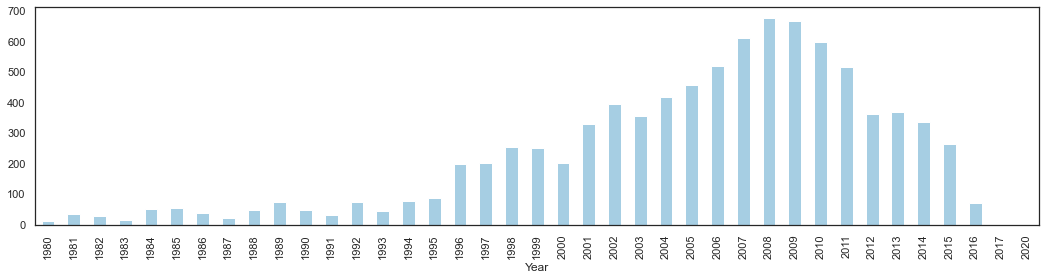

In [ ]:
# Bar Plot (Sales)
# 발매된 게임의 총 판매량 : 증가하다가 2008년 이후 감소세

plt.figure(figsize=(18, 4))
df.groupby('Year').Total_Sales.sum().plot(kind='bar');

#### 2008년에 최고점을 찍고 감소하는 중
#### 비디오 게임 자체에 대한 선호도가 움직이는 상황

In [ ]:
genres = list(df.groupby('Genre').Total_Sales.sum().sort_values().index)
genres.reverse()

### 연도별 장르 트렌드 분석

In [ ]:
# 장르 - 연도 (갯수) 카이제곱검정

gnc = pd.DataFrame()
for i in genres:
    count = df[df['Genre'] == i].groupby('Year').count().Name[:-1]
    gnc = gnc.append(dict(count), ignore_index=True)

gnc.index = genres
gnc.fillna(0, inplace=True)
gnc = gnc.T

print(gnc.tail(5))
stats.chi2_contingency(gnc)[0:3]

      Action  Sports  Shooter  Role-Playing  Platform  Misc  Racing  Fighting  \
2012   264.0    54.0     48.0          78.0      12.0  38.0    30.0      29.0   
2013   148.0    53.0     59.0          70.0      37.0  42.0    16.0      20.0   
2014   186.0    55.0     47.0          91.0      10.0  41.0    27.0      23.0   
2015   253.0    62.0     34.0          78.0      14.0  39.0    19.0      21.0   
2016   119.0     0.0      0.0          40.0       0.0   0.0     0.0       0.0   

      Simulation  Puzzle  Adventure  Strategy  
2012        18.0    11.0       57.0      15.0  
2013        18.0     3.0       60.0      19.0  
2014        11.0     8.0       75.0       8.0  
2015        15.0     0.0       53.0      17.0  
2016         9.0     0.0        0.0       0.0  


(3031.797858676031, 0.0, 396)

In [ ]:
# H0 : Two variables are independent ( rejected )
# H1 : Two variables are dependent to each other

# 사람들이 선호하는 장르는 연도에 따라 변화한다.

In [ ]:
# 연도별 장르 매출 비율

temp = pd.DataFrame()
for i in df['Year'].unique()[:-3]:
    sum = df[df['Year'] == i].groupby('Genre').Total_Sales.sum()
    temp = temp.append(dict(sum/sum.sum()), ignore_index=True)

temp.index = df['Year'].unique()[:-3]

temp = temp[genres]


temp.fillna(0, inplace=True)

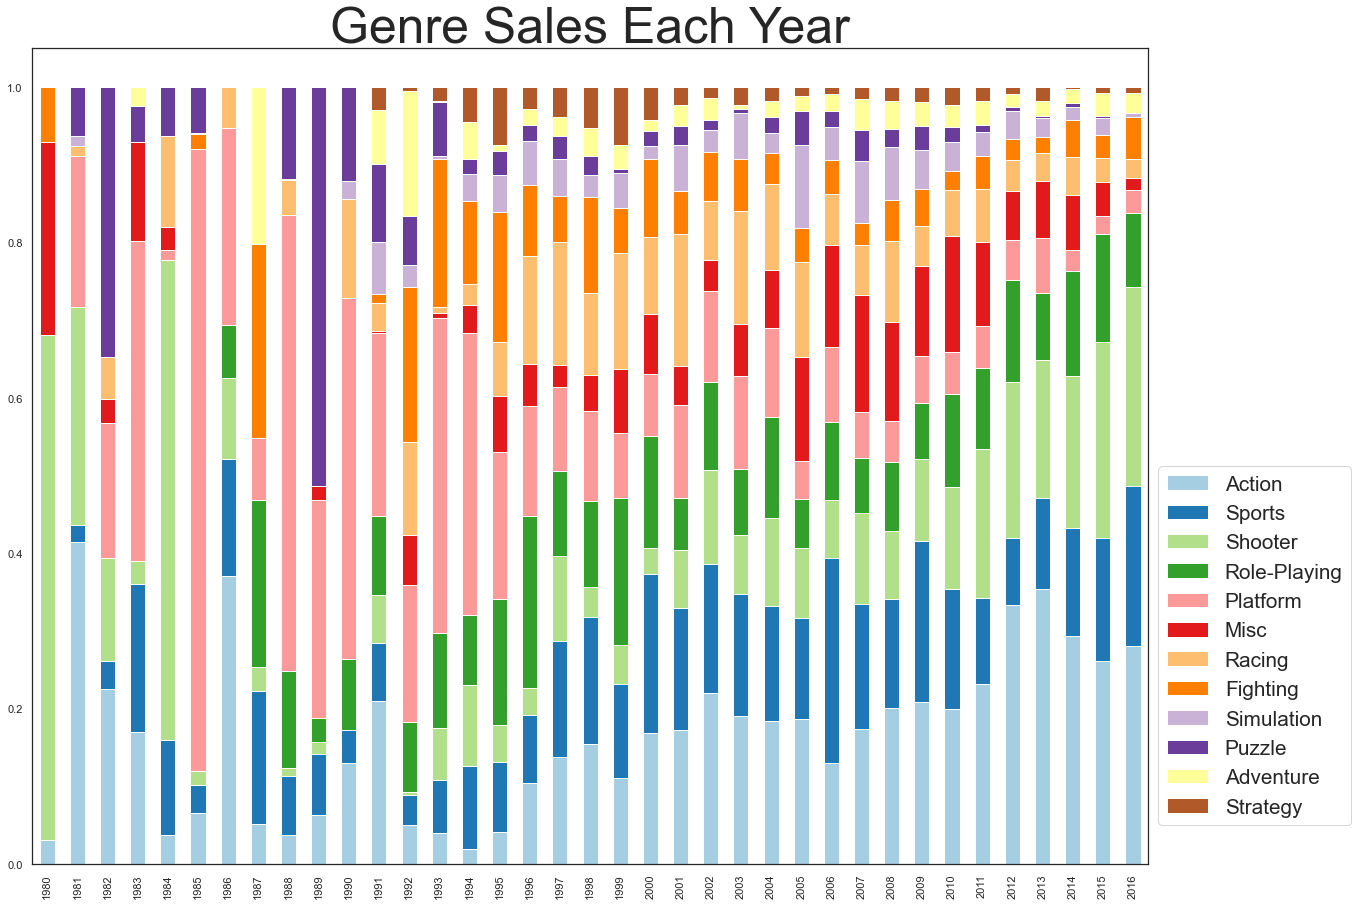

In [ ]:
temp.plot(kind='bar',
          stacked=True, mark_right=True,
          xlim=(0, 1), figsize=(20, 15), legend=True)
plt.title('Genre Sales Each Year', fontsize=50)
plt.legend(loc='upper left', bbox_to_anchor=(1, .5), fontsize='xx-large');

### 연도별 플랫폼 트렌드 분석

In [ ]:
df['Platform'].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD',
       'SAT', 'PS', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2',
       'GBA', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

In [ ]:
# 연도 - 플랫폼 (갯수) 카이제곱 검정

pfc = pd.DataFrame()
for i in df['Year'].unique()[: -3]:
    sum = df[df['Year'] == i].Platform.value_counts()
    pfc = pfc.append(dict(sum), ignore_index=True)
    
pfc.fillna(0, inplace=True)
pfc.index = df['Year'].unique()[:-3]
pfc

stats.chi2_contingency(pfc)

(75350.94503150093,
 0.0,
 1080,
 array([[6.39588311e-02, 5.40341849e-02, 1.17551921e+00, ...,
         7.88458004e-02, 1.84708693e-01, 1.17441647e-01],
        [3.26900692e-01, 2.76174723e-01, 6.00820928e+00, ...,
         4.02989647e-01, 9.44066654e-01, 6.00257306e-01],
        [2.55835324e-01, 2.16136740e-01, 4.70207682e+00, ...,
         3.15383202e-01, 7.38834773e-01, 4.69766587e-01],
        ...,
        [4.13600441e+00, 3.49421062e+00, 7.60169087e+01, ...,
         5.09869509e+00, 1.19444955e+01, 7.59455982e+00],
        [4.36341359e+00, 3.68633217e+00, 8.01965325e+01, ...,
         5.37903572e+00, 1.26012375e+01, 8.01213012e+00],
        [2.44464866e+00, 2.06530662e+00, 4.49309563e+01, ...,
         3.01366170e+00, 7.05997672e+00, 4.48888072e+00]]))

In [ ]:
# H0 : Two variables are independent ( rejected )
# H1 : Two variables are dependent to each other

# 연도별로 게임이 발매된 플랫폼의 트렌드는 변화한다.

In [ ]:
# 연도별 플랫폼 매출 비율

pf = pd.DataFrame()
for i in df['Year'].unique()[:-3]:
    sum = df[df['Year'] == i].groupby('Platform').Total_Sales.sum()
    pf = pf.append(dict(sum/sum.sum()), ignore_index=True)

pf.index = df['Year'].unique()[:-3]
platforms = list(df['Platform'].unique())
pf = pf[platforms]

pf.fillna(0, inplace=True)

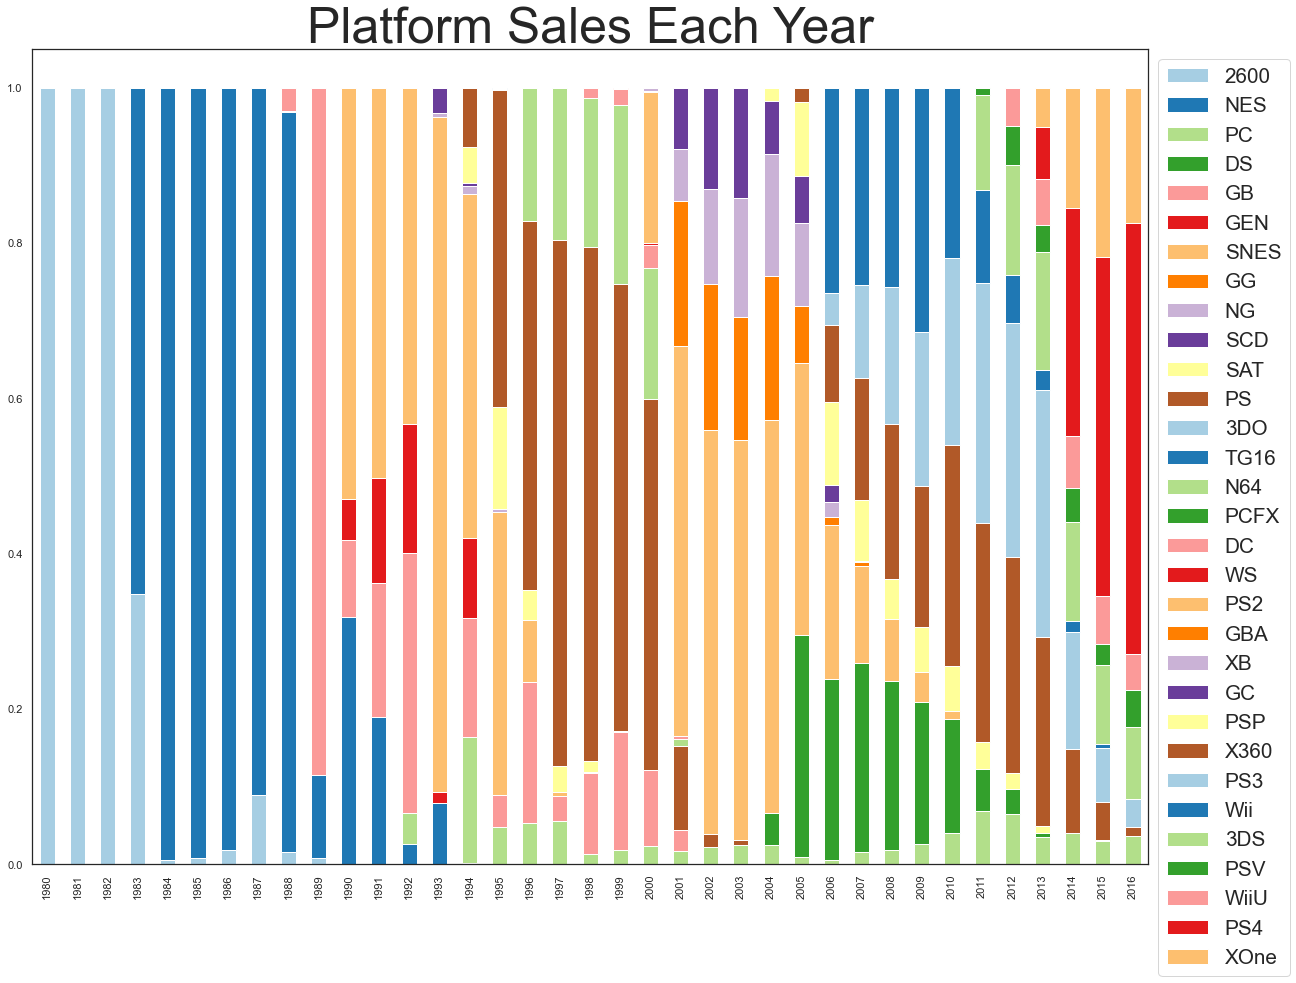

In [ ]:
pf.plot(kind='bar',
          stacked=True, mark_right=True,
          xlim=(0, 1), figsize=(20, 15), legend=True)
plt.title('Platform Sales Each Year', fontsize=50)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-large');

#### 시간이 지나면 플랫폼은 사라져버린다!!!! 
#### 장르와 다르게 플랫폼에는 수명이 존재한다. 

#### 선호하는 장르도, 유행하는 플랫폼(하드웨어 기기) 뿐만 아니라 
#### 전체 비디오게임이 발매되는 숫자와 판매량도 시간이 지나면서 계속 바뀌고 있다.
### 결론 : 연도별 게임의 트렌드는 존재한다.

# Q3 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
# '출고량이 높은 게임' 선정 
# 정규화
df_z = df.copy()
df_z.loc[:, 'NA_Sales':'Total_Sales'] = (
    df.loc[:, 'NA_Sales':'Total_Sales'] 
    - df.loc[:, 'NA_Sales':'Total_Sales'].mean()) / np.std(df.loc[:, 'NA_Sales':'Total_Sales'])

In [ ]:
# 출고량이 높은 데이터 = 1.5 표준편차 이상의 데이터

alpha = df[df_z['Total_Sales']> 1.5]
alpha

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
51,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
66,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
93,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
113,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
...,...,...,...,...,...,...,...,...,...,...
16294,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
16378,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
16381,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
16436,Madden NFL 2004,PS2,<NA>,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.24


In [ ]:
print('상위게임의 매출량  : ', round(alpha.Total_Sales.sum(),2))      # 상위 504개의 게임이 전체의 35% 이상을 차지
print('전체게임의 매출량  : ', df.Total_Sales.sum())
print('상위게임의 비율    : ', round(len(alpha)/len(df), 2))
print('상위게임의 매출비중: ', round(alpha.Total_Sales.sum()/df.Total_Sales.sum(), 2))

상위게임의 매출량  :  3187.74
전체게임의 매출량  :  8915.85
상위게임의 비율    :  0.03
상위게임의 매출비중:  0.36


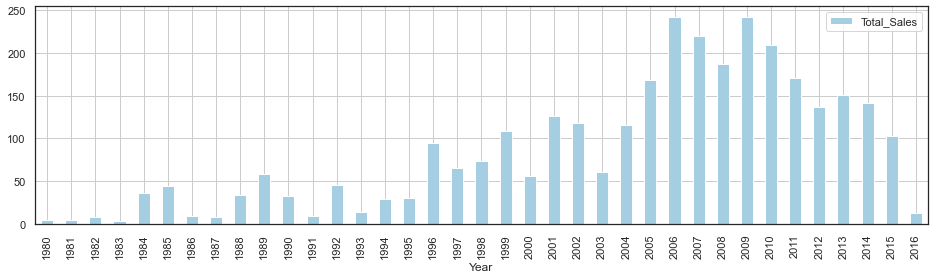

In [ ]:
# 각 해 출시된 '상위매출게임'의 매출량

pd.DataFrame(alpha.groupby('Year')
             .Total_Sales.sum()).plot(kind='bar',
                                      figsize=(16, 4), grid=True);
# 전체 게임 매출량 분포와 유사한 것을 확인
# 특정 시기에 몰린 것이 아니다

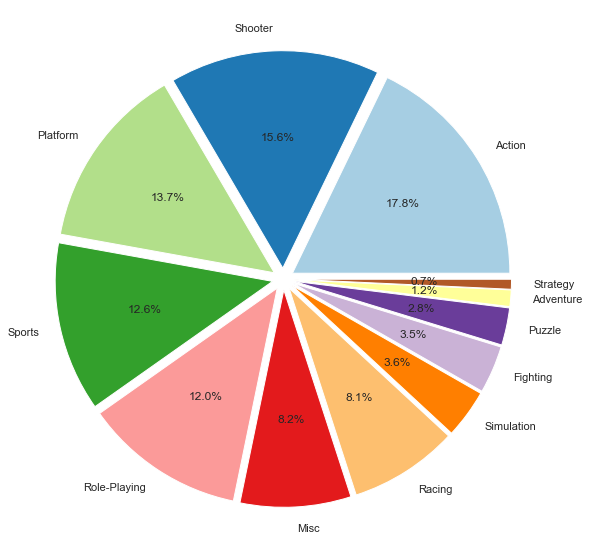

In [ ]:
# 상위매출 게임의 장르별 매출 분포
genre_a = alpha.groupby('Genre').Total_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(genre_a, labels=genre_a.index, explode=[0.05]*len(genre_a), autopct='%1.1f%%');

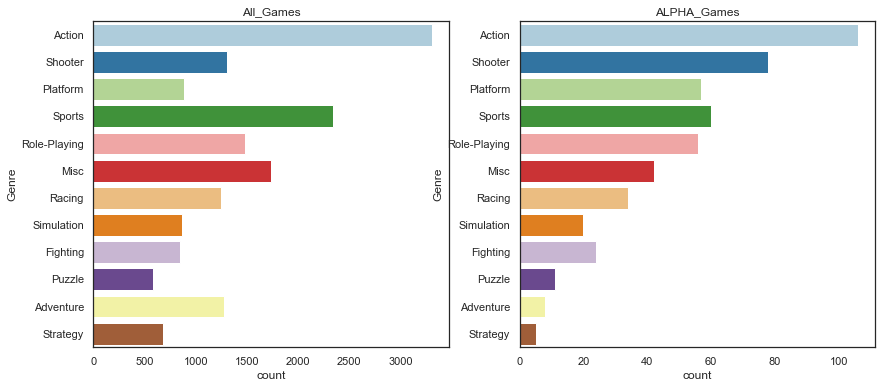

In [ ]:
# 전체게임과 상위게임의 발매된 장르에 차이가 있음을 확인
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('All_Games')
sns.countplot(y=df['Genre'], order=genre_a.index)
plt.subplot(122)
plt.title('ALPHA_Games')
sns.countplot(y=alpha['Genre'], order=genre_a.index);

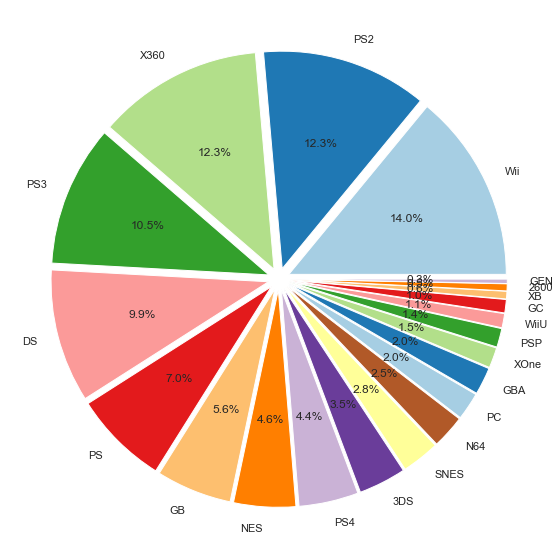

In [ ]:
# 상위매출 게임의 플랫폼 분포
platform_a = alpha.groupby('Platform').Total_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(platform_a, labels=platform_a.index, explode=[.05]*len(platform_a), autopct='%1.1f%%');

In [ ]:
# 상위매출 게임의 퍼블리셔
publish_a = alpha.Publisher.value_counts()
print('포함된 게임사 : ', publish_a.nunique())
print(publish_a)

포함된 게임사 :  16
Nintendo                                  141
Electronic Arts                            66
Sony Computer Entertainment                53
Activision                                 46
Ubisoft                                    29
Take-Two Interactive                       24
Microsoft Game Studios                     22
Capcom                                     13
Konami Digital Entertainment               11
Sega                                       11
Eidos Interactive                           9
Bethesda Softworks                          9
Warner Bros. Interactive Entertainment      7
Atari                                       7
Namco Bandai Games                          7
THQ                                         7
LucasArts                                   5
Square Enix                                 5
505 Games                                   4
Virgin Interactive                          4
Enix Corporation                            4
SquareSoft          

In [ ]:
# Non zero count ChiSquare Test ( Genre - Region )
# '상위게임' 중에서도 지역에 따라 선호하는 장르가 다를까 ( 1번에서 한 분석 )
stacked = np.array([[0, 0, 0, 0]])

for i in genre_a.index:
    stack = np.count_nonzero(alpha[alpha['Genre'] == i].loc[:, 'NA_Sales':'Other_Sales'], axis=0)
    stacked = np.concatenate((stacked, stack.reshape(1, 4)), axis=0)

    
stacked = pd.DataFrame(stacked)
stacked.drop(index= [0], inplace=True)
stacked.index = genre_a.index
stacked.columns=['NA', 'EU', 'JP', 'Other']

In [ ]:
stats.chi2_contingency(stacked)

(3.5476667541540845,
 0.9999999999718052,
 33,
 array([[106.47120419, 104.7539267 ,  93.16230366, 105.61256545],
        [ 78.42513089,  77.16020942,  68.62198953,  77.79267016],
        [ 57.90994764,  56.97591623,  50.67120419,  57.44293194],
        [ 59.98743455,  59.01989529,  52.48900524,  59.50366492],
        [ 52.4565445 ,  51.6104712 ,  45.89947644,  52.03350785],
        [ 39.73193717,  39.09109948,  34.76544503,  39.41151832],
        [ 34.27853403,  33.72565445,  29.99371728,  34.00209424],
        [ 19.21675393,  18.90680628,  16.81465969,  19.0617801 ],
        [ 24.15078534,  23.76125654,  21.13193717,  23.95602094],
        [ 11.16649215,  10.98638743,   9.77068063,  11.07643979],
        [  7.79057592,   7.66492147,   6.81675393,   7.72774869],
        [  4.41465969,   4.3434555 ,   3.86282723,   4.37905759]]))

In [ ]:
# H0 : Two variables are independent ( accepted )

# 전체 비디오게임 데이터와는 다르게 
# 상위게임의 경우 선호하는 장르가 지역별로 차이가 없었다!

## Analysis Result
### 1. 국가별로 선호장르에 차이가 존재한다. 다만, '상위매출게임'에 한해 차이가 없다.
### 2. 연도별로 트렌드는 계속 변화한다! 특히 플랫폼은 수명이 있다.
### 3. '상위매출게임'  Action, Shooter, Platform / Wii, PS2, X360 의 비중이 높다. 

# 우리가 다음 분기에 만들어야 하는 게임은?

### 데이터를 통해 확인한 점
- 장르는 최근까지 인기가 좋았던 액션장르
- 플랫폼은 지금 현재 가장 유행하는 플랫폼 확인
- 닌텐도의 스타일과 유사하게? 

### 마지막으로 확인할 점

- 출시 국가는 어떻게 할까?

In [ ]:
# 게임이 출시된 지역의 갯수가 매출에 영향을 줄까?

df['n_region'] = df.loc[:, 'NA_Sales':'Other_Sales'].apply(np.count_nonzero, axis=1)

pub4 = df[df.n_region==4]
pub3 = df[df.n_region==3]
pub2 = df[df.n_region==2]
pub1 = df[df.n_region==1]

df.groupby('n_region').Total_Sales.describe()[['count', 'mean', 'std']].T

n_region,0,1,2,3,4
count,1.0,4632.000000,3674.000000,5913.000000,2378.000000
mean,0.0,0.098187,0.179320,0.528732,1.966291
std,NaN,0.207175,0.287168,0.646317,3.608285


In [ ]:
f, pval = stats.f_oneway(pub4.Total_Sales, pub3.Total_Sales, pub2.Total_Sales, pub1.Total_Sales)
print('F-stat : ', f, '\npvalue : ', pval)

F-stat :  1014.311192139078 
pvalue :  0.0


In [ ]:
# F-test H0 : 그룹 간 평균에 차이가 없다 ( rejected )
# H1 : 그룹 간 평균에 차이가 있다.

# 발매된 지역의 갯수를 기준으로 그룹을 나눴을 떄 , 그룹 간 확연한 차이가 존재한다. 
# 4개 지역에 모두 발매하는 것이 판매량이 높다.

## 다음 분기에 설계할 게임 제안 : 
### 액션 장르 / 현재 최신유행 플랫폼 / 4개 국가지역 전부 발매 / Nintendo 스타일